## Time Series Analysis and Forecasting on sales data

### Problem Statement : 
We are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

### Data :
Anonymized information about the 45 stores, indicating the type and size of store. The data contains additional data related to the store, department, and regional activity for the given dates.

    Store - the store number
    Date - the week
    Temperature - average temperature in the region
    Fuel_Price - cost of fuel in the region
    MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
    CPI - the consumer price index
    Unemployment - the unemployment rate
    IsHoliday - whether the week is a special holiday week



Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

    Store - the store number
    Dept - the department number
    Date - the week
    Weekly_Sales -  sales for the given department in the given store
    IsHoliday - whether the week is a special holiday week


### The Task

Predict the department-wide sales for each store for the following year.

Model the effects of markdowns on holiday weeks.

Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact


In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [2]:
data = pd.read_csv('sales_data.csv')

In [3]:
data.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [4]:
data.shape

(421570, 17)

In [5]:
data.tail()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,421565,45,98,2012-09-28,508.37,False,18.266667,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,1,118221
421566,421566,45,98,2012-05-10,628.10,False,18.272222,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,1,118221
421567,421567,45,98,2012-12-10,1061.02,False,12.483333,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,1,118221
421568,421568,45,98,2012-10-19,760.01,False,13.594444,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,1,118221
421569,421569,45,98,2012-10-26,1076.80,False,14.916667,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,1,118221


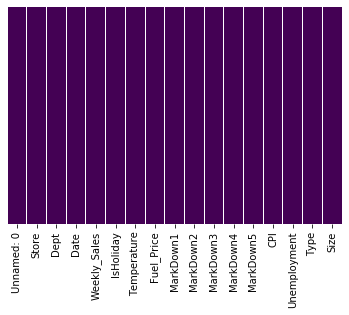

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Dept          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Weekly_Sales  421570 non-null  float64
 5   IsHoliday     421570 non-null  bool   
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(5), object(1)
mem

In [8]:
data.describe()

,Unnamed: 0,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,210784.500000,22.200546,44.260317,15981.258123,15.605588,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,121696.920828,12.785297,30.492054,22711.183519,10.248851,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,0.000000,1.000000,1.000000,-4988.940000,-18.922222,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,105392.250000,11.000000,18.000000,2079.650000,8.155556,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,210784.500000,22.000000,37.000000,7612.030000,16.716667,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,316176.750000,33.000000,74.000000,20205.852500,23.488889,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,421569.000000,45.000000,99.000000,693099.360000,37.855556,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [9]:
remove = ['Unnamed: 0']
data.drop(remove,axis=1,inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [10]:
print("Maximum Weekly Sales",data['Weekly_Sales'].max())
print("Minimum Weekly Sales",data['Weekly_Sales'].min())


Maximum Weekly Sales 693099.36
Minimum Weekly Sales -4988.94


In [11]:
print("Maximum Temperature :",data['Temperature'].max())
print("Minimum Temperature :",data['Temperature'].min())

Maximum Temperature : 37.85555555555555
Minimum Temperature : -18.922222222222224


In [12]:
data['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

In [13]:
print("Departments : ")
dept = data['Dept'].unique()
print(dept)
print("-"*30)
print("Number of departments :",len(dept))

Departments : 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]
------------------------------
Number of departments : 81


In [14]:
print(data['Type'].value_counts())

0    215478
1    163495
2     42597
Name: Type, dtype: int64


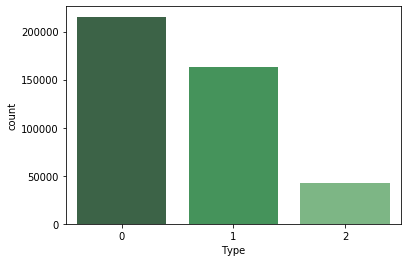

In [15]:
sns.countplot(x="Type",data=data,palette="Greens_d")

In [16]:
data['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

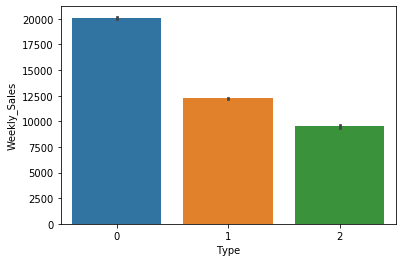

In [17]:
sns.barplot(x="Type",y="Weekly_Sales",data=data)

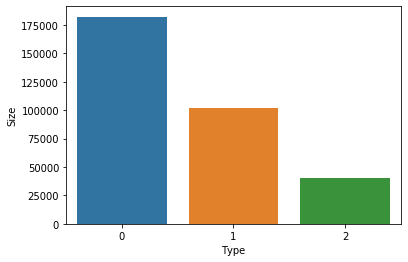

In [18]:
sns.barplot(x="Type",y="Size",data=data)

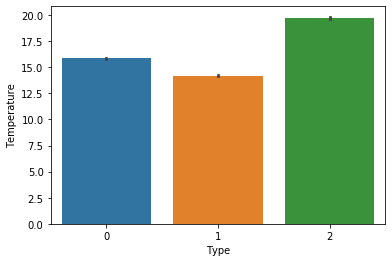

In [19]:
sns.barplot(x="Type",y="Temperature",data=data)

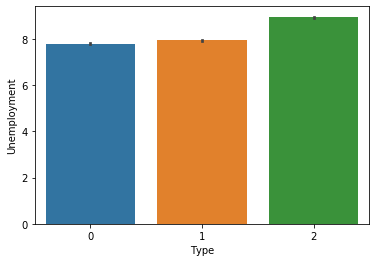

In [20]:
sns.barplot(x="Type",y="Unemployment",data=data)

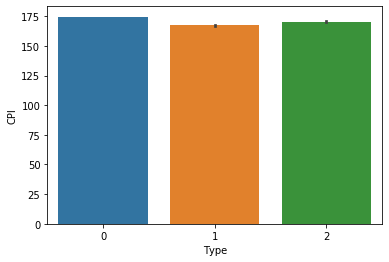

In [21]:
sns.barplot(x="Type",y="CPI",data=data)

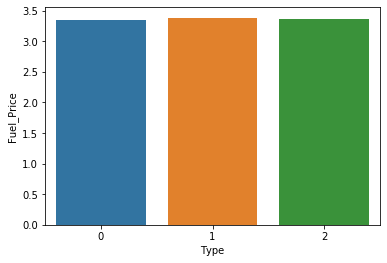

In [22]:
sns.barplot(x="Type",y="Fuel_Price",data=data)

[]

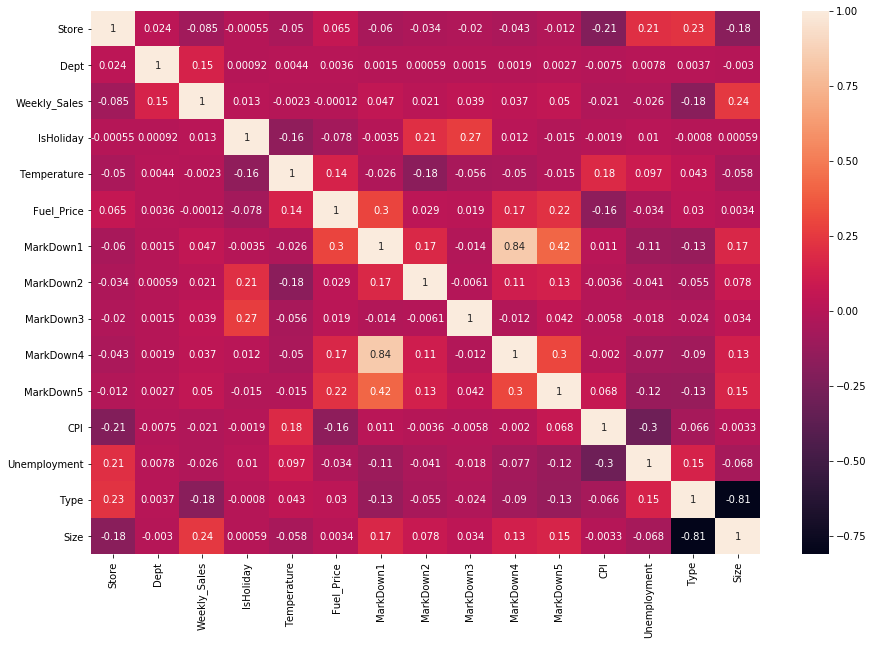

In [23]:
corr = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

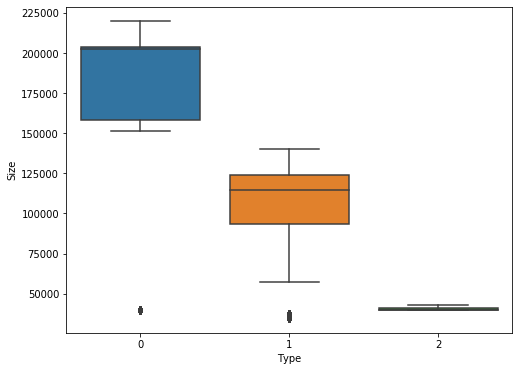

In [24]:
type_size = pd.concat([data['Type'], data['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=type_size)

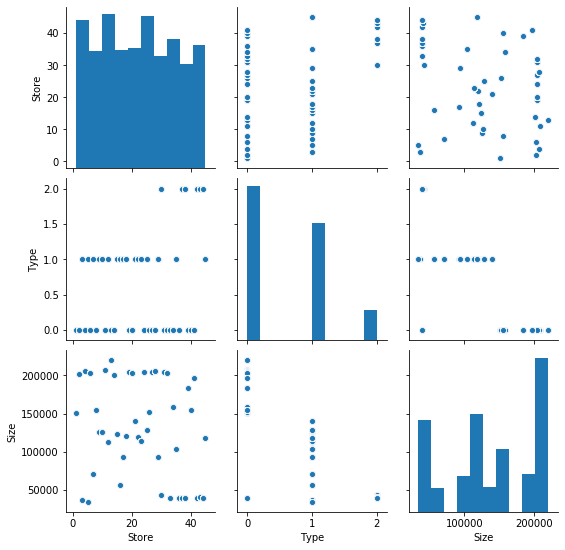

In [25]:
sns.pairplot(data, vars = ['Store','Type','Size'])

In [26]:
cols = ['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type','Size','Store','Dept','IsHoliday']
data.drop(cols,axis=1,inplace=True)

In [27]:
data.head()

,Date,Weekly_Sales
0,2010-05-02,24924.50
1,2010-12-02,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-05-03,21827.90


In [28]:
data.shape

(421570, 2)

In [29]:
data.to_csv(r'C:\Users\NEELESH\Desktop\Time Series Analysis\cleaned_sales_data.csv', index = False)

In [30]:
sales = pd.read_csv('cleaned_sales_data.csv',index_col=[0],parse_dates=True,squeeze=True)

In [31]:
sales.head()

Date
2010-05-02    24924.50
2010-12-02    46039.49
2010-02-19    41595.55
2010-02-26    19403.54
2010-05-03    21827.90
Name: Weekly_Sales, dtype: float64

###### Dates of prominent holidays from '2010-01-10' to '2012-12-10': 
Super Bowl - 2010-02-07, 2011-02-07, 2012-02-06

Labor Day - 2010-09-06, 2011-09-05, 2012-09-03

Thanksgiving - 2010-11-25, 2011-11-24, 2012-11-22

Christmas - 2010-12-25, 2011-12-25, 2012-12-25

In [32]:
a = sales["2010-02-01":"2010-02-07"].shape
b = sales["2011-02-01":"2011-02-07"].shape
c = sales["2012-01-31":"2012-02-06"].shape
a[0] + b[0] + c[0]
print("Number of purchases in the Super Bowl week is",a[0] + b[0] + c[0])

Number of purchases in the Super Bowl week is 8856


In [33]:
#Labor Day - 2010-09-06, 2011-09-05, 2012-09-03
a = sales["2010-08-31":"2010-09-06"].shape
b = sales["2011-08-29":"2011-09-05"].shape
c = sales["2012-08-27":"2012-02-03"].shape
a[0] + b[0] + c[0]
print("Number of purchases in the Labor Day week is",a[0] + b[0] + c[0])

Number of purchases in the Labor Day week is 2951


In [34]:
a = sales["2010-11-18":"2010-11-25"].shape
b = sales["2011-11-17":"2011-11-24"].shape
c = sales["2012-11-15":"2012-11-22"].shape
print("Number of purchases in the Thanksgiving week is",a[0] + b[0] + c[0])

Number of purchases in the Thanksgiving week is 5877


In [35]:
#Christmas - 2010-12-25, 2011-12-25, 2012-12-25
a = sales["2010-12-18":"2010-12-25"].shape
b = sales["2011-12-18":"2011-12-25"].shape
c = sales["2012-12-18":"2012-12-25"].shape
a[0] + b[0] + c[0]
print("Number of purchases in the Christmas week is",a[0] + b[0] + c[0])

Number of purchases in the Christmas week is 5983


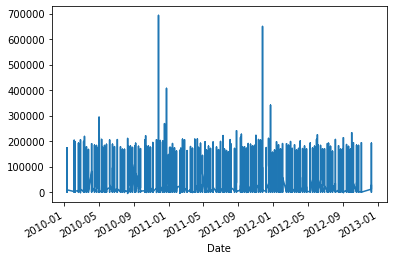

In [36]:
sales.plot()

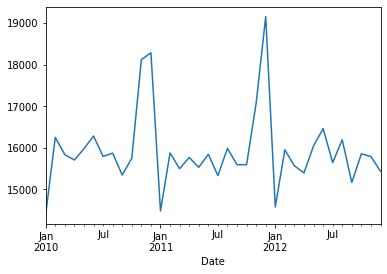

In [37]:
sales.resample('M').mean().plot()

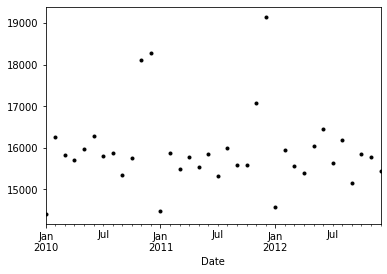

In [38]:
sales.resample('M').mean().plot(style='k.')

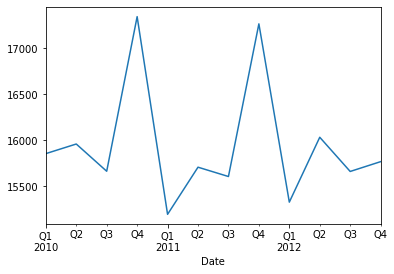

In [39]:
sales.resample('Q').mean().plot()

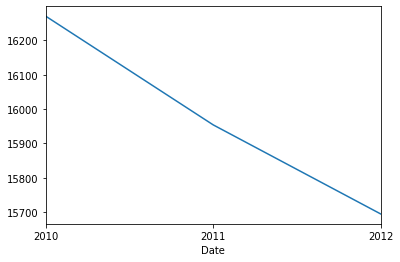

In [40]:
sales.resample('A').mean().plot()

In [41]:
sales.resample('M').mean()

Date
2010-01-31    14391.780535
2010-02-28    16244.436211
2010-03-31    15828.833079
2010-04-30    15701.015586
2010-05-31    15971.989499
2010-06-30    16278.409330
2010-07-31    15785.689680
2010-08-31    15866.055025
2010-09-30    15339.655205
2010-10-31    15742.806495
2010-11-30    18118.582008
2010-12-31    18285.014095
2011-01-31    14471.611234
2011-02-28    15872.183056
2011-03-31    15490.811225
2011-04-30    15762.759190
2011-05-31    15524.557693
2011-06-30    15839.296649
2011-07-31    15324.714393
2011-08-31    15979.696402
2011-09-30    15587.117990
2011-10-31    15587.928852
2011-11-30    17069.858089
2011-12-31    19154.569311
2012-01-31    14570.279140
2012-02-29    15944.362413
2012-03-31    15558.979707
2012-04-30    15390.168452
2012-05-31    16040.929182
2012-06-30    16456.816992
2012-07-31    15638.946864
2012-08-31    16187.597099
2012-09-30    15157.303934
2012-10-31    15848.941251
2012-11-30    15784.015806
2012-12-31    15427.596739
Freq: M, Name: Weekly_S

In [42]:
sales = sales.resample('M').mean()

In [43]:
sales.head()

Date
2010-01-31    14391.780535
2010-02-28    16244.436211
2010-03-31    15828.833079
2010-04-30    15701.015586
2010-05-31    15971.989499
Freq: M, Name: Weekly_Sales, dtype: float64

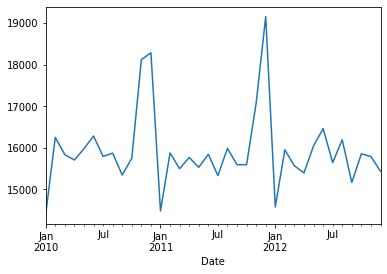

In [44]:
sales.plot()

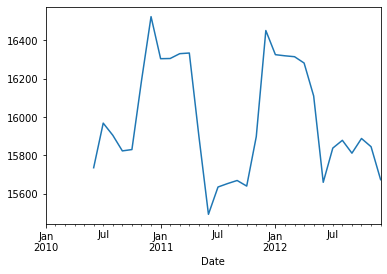

In [45]:
#Moving Average
sales_ma = sales.rolling(window=6).mean()
sales_ma.plot()

The graph is smoothened.

In [46]:
sales.head()

Date
2010-01-31    14391.780535
2010-02-28    16244.436211
2010-03-31    15828.833079
2010-04-30    15701.015586
2010-05-31    15971.989499
Freq: M, Name: Weekly_Sales, dtype: float64

In [47]:
sales_base = pd.concat([sales,sales.shift(1)],axis=1)

In [48]:
sales_base.head()

,Weekly_Sales,Weekly_Sales
Date,,
2010-01-31,14391.780535,NaN
2010-02-28,16244.436211,14391.780535
2010-03-31,15828.833079,16244.436211
2010-04-30,15701.015586,15828.833079
2010-05-31,15971.989499,15701.015586


In [49]:
sales_base.columns=['Actual_Sales','Forecast_Sales']

In [50]:
sales_base.head()

,Actual_Sales,Forecast_Sales
Date,,
2010-01-31,14391.780535,NaN
2010-02-28,16244.436211,14391.780535
2010-03-31,15828.833079,16244.436211
2010-04-30,15701.015586,15828.833079
2010-05-31,15971.989499,15701.015586


In [51]:
sales_base.dropna()
sales_base.head()

,Actual_Sales,Forecast_Sales
Date,,
2010-01-31,14391.780535,NaN
2010-02-28,16244.436211,14391.780535
2010-03-31,15828.833079,16244.436211
2010-04-30,15701.015586,15828.833079
2010-05-31,15971.989499,15701.015586


In [52]:
sales_base.dropna(inplace=True)
sales_base.head()
#The changes are saved (becomes part of the dataset)

,Actual_Sales,Forecast_Sales
Date,,
2010-02-28,16244.436211,14391.780535
2010-03-31,15828.833079,16244.436211
2010-04-30,15701.015586,15828.833079
2010-05-31,15971.989499,15701.015586
2010-06-30,16278.409330,15971.989499


In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
sales_error = mean_squared_error(sales_base.Actual_Sales,sales_base.Forecast_Sales)

In [55]:
sales_error

1735337.5097677237

In [56]:
np.sqrt(sales_error)

1317.3220979577181

#### Mean squared error = 1735337.5097677237
#### Root of mean squared error = 1317.3220979577181

## ARIMA Model
ACF= Autocorrelation Function
PACF= Partial Autocorrelation Function

ACF
The autocorrelation function (ACF). Intuitively, a stationary time series is defined by its mean, variance and ACF. A useful result is that any function of a stationary time series is also a stationary time series.

PACF
In time series analysis, the partial autocorrelation function (PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags.

**p = the number of autoregressive terms**

**d = the number of nonseasonal differences**

**q = the number of moving-average terms**

In [57]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

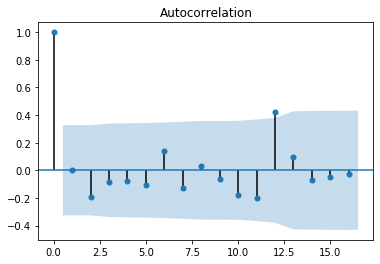

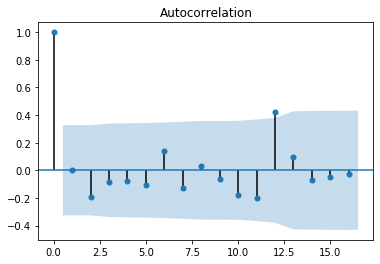

In [58]:
plot_acf(sales)

In [59]:
sales.head()

Date
2010-01-31    14391.780535
2010-02-28    16244.436211
2010-03-31    15828.833079
2010-04-30    15701.015586
2010-05-31    15971.989499
Freq: M, Name: Weekly_Sales, dtype: float64

At x=0, The correlation between the first term (14391.780535 and 14391.780535) is 1. q will be 12

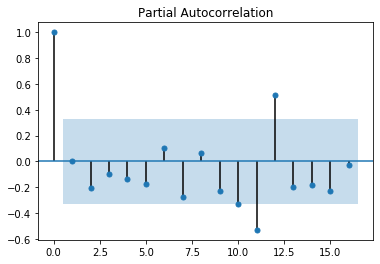

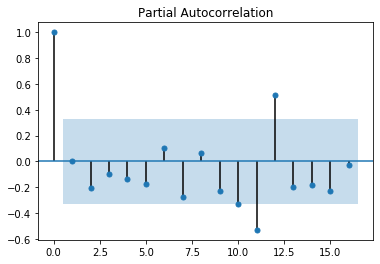

In [60]:
plot_pacf(sales)

In [61]:
from statsmodels.tsa.arima_model import ARIMA

In [62]:
n = sales.size
#Taking 70% of the data as training data and 30% as testing data

In [63]:
m = int(0.7*n)
m

25

In [64]:
sales_train = sales[0:m] #First 25 values
sales_test = sales[m:] #Remaining 11 values

In [65]:
#sales_model = ARIMA(sales_train,order=(p,d,q))

In [66]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
#pdq

In [67]:
sales_model = ARIMA(sales_train,order=(2,2,1))

In [68]:
sales_model_fit = sales_model.fit()

In [69]:
sales_model_fit.aic

410.2907494525808

In [70]:
sales_forecast = sales_model_fit.forecast(steps=11)[0]
sales_forecast

array([15645.36768941, 17552.33644798, 16177.53242947, 15849.48517512,
       16710.62693719, 16484.94666019, 16129.91562002, 16374.99459991,
       16400.79843755, 16205.52701384, 16208.63663127])

In [71]:
np.sqrt(mean_squared_error(sales_test,sales_forecast))

856.9468001895644

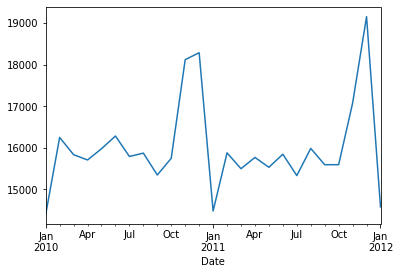

In [72]:
sales_train.plot()

In [73]:
sales_test.values

array([15944.36241349, 15558.97970735, 15390.16845207, 16040.92918151,
       16456.81699161, 15638.94686351, 16187.59709893, 15157.30393441,
       15848.94125053, 15784.01580558, 15427.59673913])

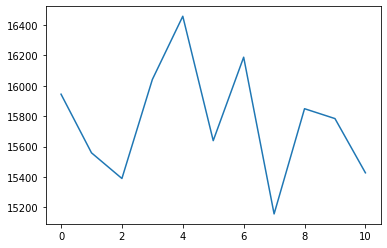

In [74]:
plt.plot(sales_test.values)

In [75]:
sales_forecast

array([15645.36768941, 17552.33644798, 16177.53242947, 15849.48517512,
       16710.62693719, 16484.94666019, 16129.91562002, 16374.99459991,
       16400.79843755, 16205.52701384, 16208.63663127])

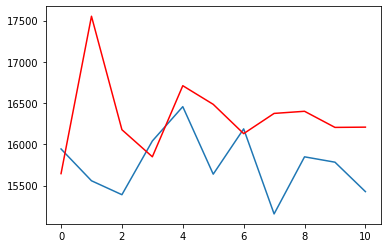

In [76]:
plt.plot(sales_test.values)
plt.plot(sales_forecast,color='red')

**Error in ARIMA model = 856.947**

**Error in Baseline model = 1317.322**


Thus ARIMA model is found to be better. 
